In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("../full dataset/combine",target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 19889 images belonging to 16 classes.


In [24]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [25]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
new_model = tf.keras.models.load_model('classifyWaste.h5')
new_model.summary()
new_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

In [26]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [27]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 16, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 2, steps_per_epoch=len(train_data))
# epoch = 28

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10400\4121139860.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_data, epochs = 2, steps_per_epoch=len(train_data))


Epoch 1/2
622/622 [==============================] - 2686s 4s/step - loss: 1.7460 - accuracy: 0.4996
Epoch 2/2
622/622 [==============================] - 2420s 4s/step - loss: 1.4471 - accuracy: 0.5765


In [ ]:
# output_class = ["batteries", 
#                 "clothes", 
#                 "e-waste", 
#                 "glass", 
#                 "light blubs", 
#                 "metal", 
#                 "organic", 
#                 "paper", 
#                 "plastic"]

In [31]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries",
                "biological",
                "brown glass",
                "cardboard",
                "clothes", 
                "e waste",
                "glass",
                "green glass",
                "light blubs", 
                "metal", 
                "organic", 
                "paper", 
                "plastic",
                "shoes",
                "trash",
                "white glass"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


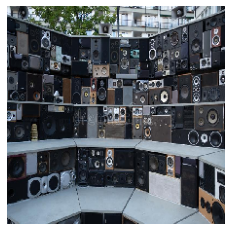

1/1 [==============================] - 0s 149ms/step
Your waste material is  e waste  with  99.58  % accuracy


In [42]:
waste_prediction("./testing file/ewaste 3.jpg")

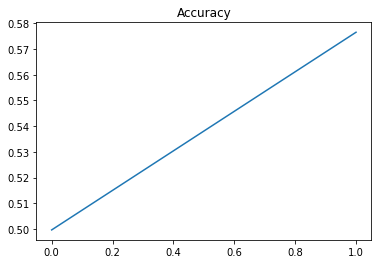

In [46]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

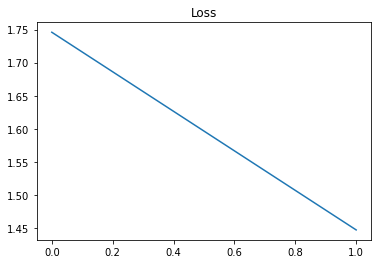

In [47]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [3]:
model.save("classifyWastetest1.h5")

NameError: name 'model' is not defined